In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import importlib
import utils
import simulatedannealing
import random_optimize
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(simulatedannealing)
importlib.reload(random_optimize)
from utils import *


CLUSTER RESULTS - 28.09.2023

In [159]:
import pickle

with open('../surdata/tree23_iter-10_objective-meanopt10-03-2023_18:04.pkl', 'rb') as file:
    # Load the object from the file
    loaded_data = pickle.load(file)

In [160]:
model, time, xSA, ySA, timeSA = loaded_data

In [161]:
timeSA

1539.2247278690338

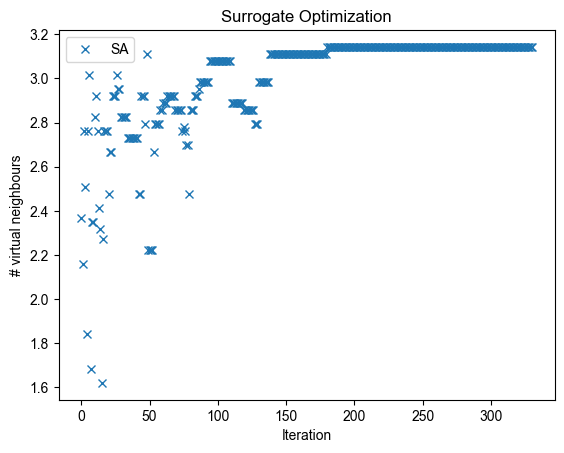

In [257]:
#fig = plt.figure(figsize=(20,10))
plt.title('Surrogate Optimization')
#plt.plot([np.mean(y_i) for y_i in np.array(model.y)[np.where(model.flag_vec)]], 'x', label='Surrogate optimization')
plt.plot([np.mean(y_i) for y_i in np.array(ySA)*-1], 'x', label='SA')
#plt.plot([np.mean(np.array(y_i)) for y_i in refmodel.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')
plt.legend()

Text(0.5, 0, 'Iteration [1]')

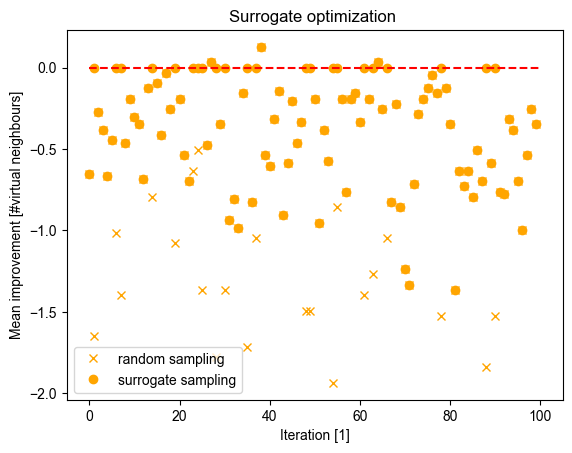

In [135]:
plt.title('Surrogate optimization ')
plt.plot(model.mean_improvement[:100], 'x', label='random sampling', color='orange')
plt.plot(np.array(model.mean_improvement[:100]).T*np.array(model.opt_vec[:100]), 'o', label='surrogate sampling',color='orange')
plt.hlines(0,0,100,colors='red',linestyles='dashed')
plt.legend()
plt.ylabel('Mean improvement [#virtual neighbours]')
plt.xlabel('Iteration [1]')

SURROGATE TEST

In [255]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

a = -5
b = 5
n=100

res = []

dim = 5
fun = lambda row: -sum([row[i]**2 for i in range(dim)])

def get_neighbour(row,count): 
    f = (1-np.log(1+count/n))**4
    return np.array([np.random.normal(row[i], scale=(np.sqrt(b-a)*f)) for i in range(dim)])

df = pd.DataFrame((b-a)*np.random.sample((1000,dim))+a)
for i in range(n):
    model = SVR()
    target = df.apply(fun, axis=1)
    model.fit(df,target)
    df_add = pd.DataFrame.from_records(df.iloc[np.argsort(target)[-20:].values].apply(get_neighbour, args=(i,), axis=1).to_numpy())
    y = model.predict(df_add)
    y = np.concatenate([target,y])
    index = y.argmax()
    #print(i)
    
    
    df = pd.concat([df, df_add], axis=0, ignore_index=True)
    res.append(df.iloc[index].to_frame().apply(fun)) 

-0.0009051172038535393


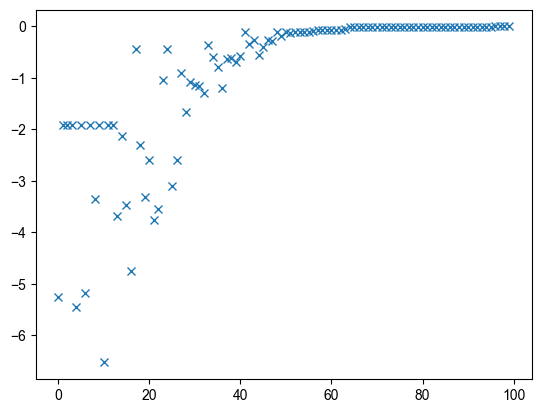

In [256]:
plt.plot(res, 'x')
print(np.max(res))